<a href="https://colab.research.google.com/github/PyHloni/PyHloniRep/blob/main/Outage_Prediction_LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data 70% and test data 30%

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from datetime import datetime
import copy
from keras.layers import RepeatVector, TimeDistributed
from keras.models import Model
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

from keras.layers import LSTM, Input, Dropout
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
read_file = pd.read_csv ('channel_11_segment_1.txt')
read_file.to_csv ('channel_11_segment_1.txt', index=None)
headerList = ['Data']
read_file.to_csv("channel_11_segment_1.csv", header = headerList, index=False)


In [ ]:
df = pd.read_csv("channel_11_segment_1.csv")
#read_file['Data'].str.split('\t')
df['Data'].str.split('\t', expand=True)
dataset_cols = ['Date', 'Q_Factor','TX_Power','Chromatic_Dispersion','Polarization_Mode_Dispersion']

df[dataset_cols] = df['Data'].str.split('\t', expand=True)

In [ ]:
df['Features'] = 'Yes'

In [ ]:
df

,Data,Date,Q_Factor,TX_Power,Chromatic_Dispersion,Polarization_Mode_Dispersion,Features
0,2015.03.19.00.15.00\t14.72\t-10.74\t-91.06\t8.72,2015.03.19.00.15.00,14.72,-10.74,-91.06,8.72,Yes
1,2015.03.19.00.30.00\t14.72\t-10.74\t-91.06\t8.72,2015.03.19.00.30.00,14.72,-10.74,-91.06,8.72,Yes
2,2015.03.19.00.45.00\t14.7\t-10.74\t-91.17\t8.76,2015.03.19.00.45.00,14.7,-10.74,-91.17,8.76,Yes
3,2015.03.19.01.00.00\t14.56\t-10.74\t-92.30\t9.10,2015.03.19.01.00.00,14.56,-10.74,-92.30,9.10,Yes
4,2015.03.19.01.15.00\t14.55\t-10.74\t-94.09\t8.81,2015.03.19.01.15.00,14.55,-10.74,-94.09,8.81,Yes
...,...,...,...,...,...,...,...
32231,2016.03.31.11.45.00\t14.8\t-10.38\t-97.99\t9.73,2016.03.31.11.45.00,14.8,-10.38,-97.99,9.73,Yes
32232,2016.03.31.12.00.00\t14.8\t-10.38\t-98.45\t9.68,2016.03.31.12.00.00,14.8,-10.38,-98.45,9.68,Yes
32233,2016.03.31.12.15.00\t14.8\t-10.38\t-97.97\t9.71,2016.03.31.12.15.00,14.8,-10.38,-97.97,9.71,Yes
32234,2016.03.31.12.30.00\t14.8\t-10.38\t-97.88\t9.81,2016.03.31.12.30.00,14.8,-10.38,-97.88,9.81,Yes


In [ ]:
df['Q_Factor'] = df['Q_Factor'].astype(float)
df['TX_Power'] = df['TX_Power'].astype(float)
df['Chromatic_Dispersion'] = df['Chromatic_Dispersion'].astype(float)
df['Polarization_Mode_Dispersion'] = df['Polarization_Mode_Dispersion'].astype(float)

df.dtypes

Data                                    object
Date                            datetime64[ns]
Q_Factor                               float64
TX_Power                               float64
Chromatic_Dispersion                   float64
Polarization_Mode_Dispersion           float64
dtype: object

In [ ]:
def Truth(x_val):
  if x_val > 14.70:
    result = '1'
  else:
    result = '0'
  return result

In [ ]:
df['Features'] = df['Q_Factor'].apply(Truth)

In [ ]:
df

,Data,Date,Q_Factor,TX_Power,Chromatic_Dispersion,Polarization_Mode_Dispersion,Features
0,2015.03.19.00.15.00\t14.72\t-10.74\t-91.06\t8.72,2015.03.19.00.15.00,14.72,-10.74,-91.06,8.72,1
1,2015.03.19.00.30.00\t14.72\t-10.74\t-91.06\t8.72,2015.03.19.00.30.00,14.72,-10.74,-91.06,8.72,1
2,2015.03.19.00.45.00\t14.7\t-10.74\t-91.17\t8.76,2015.03.19.00.45.00,14.70,-10.74,-91.17,8.76,0
3,2015.03.19.01.00.00\t14.56\t-10.74\t-92.30\t9.10,2015.03.19.01.00.00,14.56,-10.74,-92.30,9.10,0
4,2015.03.19.01.15.00\t14.55\t-10.74\t-94.09\t8.81,2015.03.19.01.15.00,14.55,-10.74,-94.09,8.81,0
...,...,...,...,...,...,...,...
32231,2016.03.31.11.45.00\t14.8\t-10.38\t-97.99\t9.73,2016.03.31.11.45.00,14.80,-10.38,-97.99,9.73,1
32232,2016.03.31.12.00.00\t14.8\t-10.38\t-98.45\t9.68,2016.03.31.12.00.00,14.80,-10.38,-98.45,9.68,1
32233,2016.03.31.12.15.00\t14.8\t-10.38\t-97.97\t9.71,2016.03.31.12.15.00,14.80,-10.38,-97.97,9.71,1
32234,2016.03.31.12.30.00\t14.8\t-10.38\t-97.88\t9.81,2016.03.31.12.30.00,14.80,-10.38,-97.88,9.81,1


In [ ]:
len(df)

32236

In [ ]:
#drop column
df.drop(['Data'], axis=1)

,Date,Q_Factor,TX_Power,Chromatic_Dispersion,Polarization_Mode_Dispersion
0,2015.03.19.00.15.00,14.72,-10.74,-91.06,8.72
1,2015.03.19.00.30.00,14.72,-10.74,-91.06,8.72
2,2015.03.19.00.45.00,14.70,-10.74,-91.17,8.76
3,2015.03.19.01.00.00,14.56,-10.74,-92.30,9.10
4,2015.03.19.01.15.00,14.55,-10.74,-94.09,8.81
...,...,...,...,...,...
32231,2016.03.31.11.45.00,14.80,-10.38,-97.99,9.73
32232,2016.03.31.12.00.00,14.80,-10.38,-98.45,9.68
32233,2016.03.31.12.15.00,14.80,-10.38,-97.97,9.71
32234,2016.03.31.12.30.00,14.80,-10.38,-97.88,9.81


In [ ]:
df['Date'] = pd.to_datetime(df['Date'] , format='%Y.%m.%d.%H.%M.%S')

In [ ]:
df['Date']

0       2015-03-19 00:15:00
1       2015-03-19 00:30:00
2       2015-03-19 00:45:00
3       2015-03-19 01:00:00
4       2015-03-19 01:15:00
                ...        
32231   2016-03-31 11:45:00
32232   2016-03-31 12:00:00
32233   2016-03-31 12:15:00
32234   2016-03-31 12:30:00
32235   2016-03-31 12:45:00
Name: Date, Length: 32236, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32236 entries, 0 to 32235
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Data                          32236 non-null  object        
 1   Date                          32236 non-null  datetime64[ns]
 2   Q_Factor                      32236 non-null  float64       
 3   TX_Power                      32236 non-null  float64       
 4   Chromatic_Dispersion          32236 non-null  float64       
 5   Polarization_Mode_Dispersion  32236 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.5+ MB


In [ ]:
df_input = df[['Date','Q_Factor']]

In [ ]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32236 entries, 0 to 32235
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      32236 non-null  datetime64[ns]
 1   Q_Factor  32236 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 503.8 KB


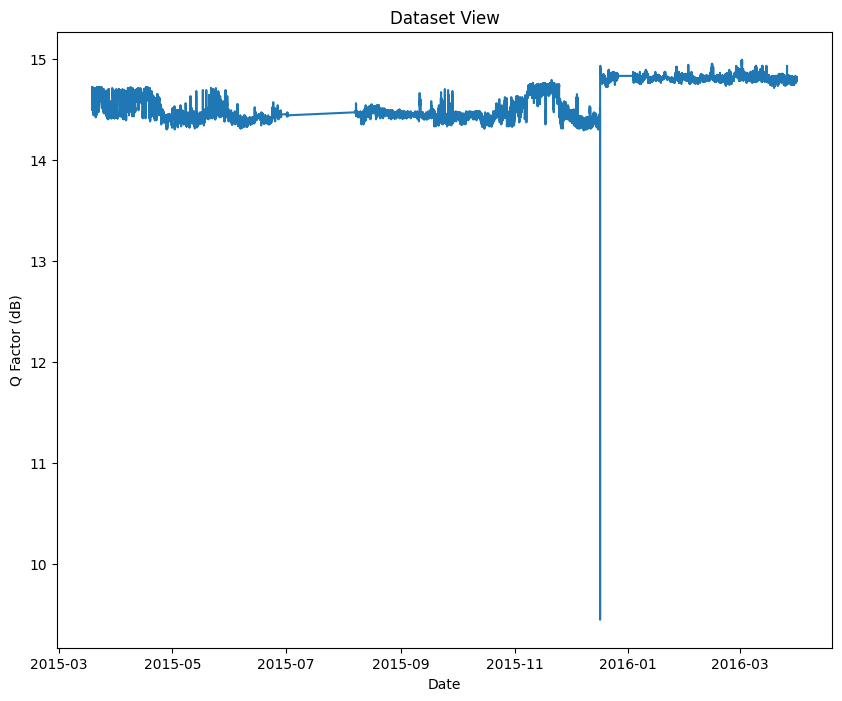

In [ ]:
#sns.lineplot(x=df_input['Date'], y=df_input['Q_Factor'])
fig, ax = plt.subplots()

x=df_input['Date']
y=df_input['Q_Factor']
plt.xlabel('Date')
plt.ylabel('Q Factor (dB)')
plt.title('Dataset View')

ax.plot(x,y)


#ax.axhline(y=10, color ='r', ls = 'dotted')
plt.show()

In [ ]:
#train, test = df_input.loc[df_input['Date'] <= '2015-11-30 00:30:00'], df_input.loc[df_input['Date'] > '2015-11-30 00:30:00']

train, test = df_input.loc[df_input['Date'] <= '2015-07-30 00:30:00'], df_input.loc[df_input['Date'] > '2015-07-30 00:30:00']


In [ ]:
test['Q_Factor']

9695     14.47
9696     14.48
9697     14.49
9698     14.47
9699     14.46
         ...  
32231    14.80
32232    14.80
32233    14.80
32234    14.80
32235    14.82
Name: Q_Factor, Length: 22541, dtype: float64

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(train[['Q_Factor']])


In [ ]:
train['Q_Factor']

0       2.227005
1       2.227005
2       2.035514
3       0.695076
4       0.599331
          ...   
9690   -0.549616
9691   -0.358125
9692   -0.453870
9693   -0.453870
9694   -0.453870
Name: Q_Factor, Length: 9695, dtype: float64

In [ ]:
train['Q_Factor']

0       14.72
1       14.72
2       14.70
3       14.56
4       14.55
        ...  
9690    14.43
9691    14.45
9692    14.44
9693    14.44
9694    14.44
Name: Q_Factor, Length: 9695, dtype: float64

In [ ]:
train['Q_Factor'] = scaler.transform(train[['Q_Factor']])
test['Q_Factor'] = scaler.transform(test[['Q_Factor']])

<ipython-input-134-821521f5732d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Q_Factor'] = scaler.transform(train[['Q_Factor']])
<ipython-input-134-821521f5732d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Q_Factor'] = scaler.transform(test[['Q_Factor']])


In [ ]:
test

,Date,Q_Factor
9695,2015-08-07 12:00:00,-0.166634
9696,2015-08-07 12:15:00,-0.070888
9697,2015-08-07 12:30:00,0.024857
9698,2015-08-07 12:45:00,-0.166634
9699,2015-08-07 13:00:00,-0.262379
...,...,...
32231,2016-03-31 11:45:00,2.992969
32232,2016-03-31 12:00:00,2.992969
32233,2016-03-31 12:15:00,2.992969
32234,2016-03-31 12:30:00,2.992969


In [ ]:
df['Q_Factor']

0        14.72
1        14.72
2        14.70
3        14.56
4        14.55
         ...  
32231    14.80
32232    14.80
32233    14.80
32234    14.80
32235    14.82
Name: Q_Factor, Length: 32236, dtype: float64

In [ ]:
seq_size = 960 # Number of time steps to look back 120 , depend on data for sequence learning

In [ ]:
def to_sequence(x, y, seq_size=1): # takes training data meanin g first 120 as x and next as y
  x_values = []
  y_values = []

  for i in range(len(x)- seq_size):
    x_values.append(x.iloc[i:(i+seq_size)].values)
    y_values.append(y.iloc[i+seq_size])
  return np.array(x_values), np.array(y_values)

array([[[ 2.22700506],
        [ 2.22700506],
        [ 2.03551395],
        ...,
        [-0.07088825],
        [-0.07088825],
        [-0.07088825]],

       [[ 2.22700506],
        [ 2.03551395],
        [ 0.69507618],
        ...,
        [-0.07088825],
        [-0.07088825],
        [-0.26237936]],

       [[ 2.03551395],
        [ 0.69507618],
        [ 0.59933063],
        ...,
        [-0.07088825],
        [-0.26237936],
        [-0.16663381]],

       ...,

       [[-0.16663381],
        [-0.26237936],
        [-0.54961602],
        ...,
        [-0.45387047],
        [-0.54961602],
        [-0.35812491]],

       [[-0.26237936],
        [-0.54961602],
        [-0.45387047],
        ...,
        [-0.54961602],
        [-0.35812491],
        [-0.45387047]],

       [[-0.54961602],
        [-0.45387047],
        [-0.45387047],
        ...,
        [-0.35812491],
        [-0.45387047],
        [-0.45387047]]])

In [ ]:
trainX, trainY = to_sequence(train[['Q_Factor']], train['Q_Factor'], seq_size)
testX, testY = to_sequence(test[['Q_Factor']], test['Q_Factor'], seq_size)

In [ ]:
trainX

array([[[ 2.22700506],
        [ 2.22700506],
        [ 2.03551395],
        ...,
        [-0.07088825],
        [-0.07088825],
        [-0.07088825]],

       [[ 2.22700506],
        [ 2.03551395],
        [ 0.69507618],
        ...,
        [-0.07088825],
        [-0.07088825],
        [-0.26237936]],

       [[ 2.03551395],
        [ 0.69507618],
        [ 0.59933063],
        ...,
        [-0.07088825],
        [-0.26237936],
        [-0.16663381]],

       ...,

       [[-0.16663381],
        [-0.26237936],
        [-0.54961602],
        ...,
        [-0.45387047],
        [-0.54961602],
        [-0.35812491]],

       [[-0.26237936],
        [-0.54961602],
        [-0.45387047],
        ...,
        [-0.54961602],
        [-0.35812491],
        [-0.45387047]],

       [[-0.54961602],
        [-0.45387047],
        [-0.45387047],
        ...,
        [-0.35812491],
        [-0.45387047],
        [-0.45387047]]])

In [ ]:
trainY.shape

(9635,)

In [ ]:
trainX.shape

(9635, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(trainX.shape[1]))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(trainX.shape[2])))
model.compile(optimizer='adam', loss='mae')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 repeat_vector_1 (RepeatVect  (None, 960, 128)         0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 960, 128)          131584    
                                                                 
 dropout_3 (Dropout)         (None, 960, 128)          0         
                                                                 
 time_distributed_1 (TimeDis  (None, 960, 1)           129       
 tributed)                                            

In [ ]:

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=0, mode='min')

history = model.fit(trainX, trainY, epochs=2, batch_size=16, validation_split=0.1, verbose=1, callbacks=[early_stopping])

Epoch 1/2
492/492 [==============================] - 937s 2s/step - loss: 0.7747 - val_loss: 0.2599
Epoch 2/2
492/492 [==============================] - 918s 2s/step - loss: 0.7735 - val_loss: 0.2702


In [ ]:
#model.compile(opimizer ='adam', loss='mse')

TypeError: ignored

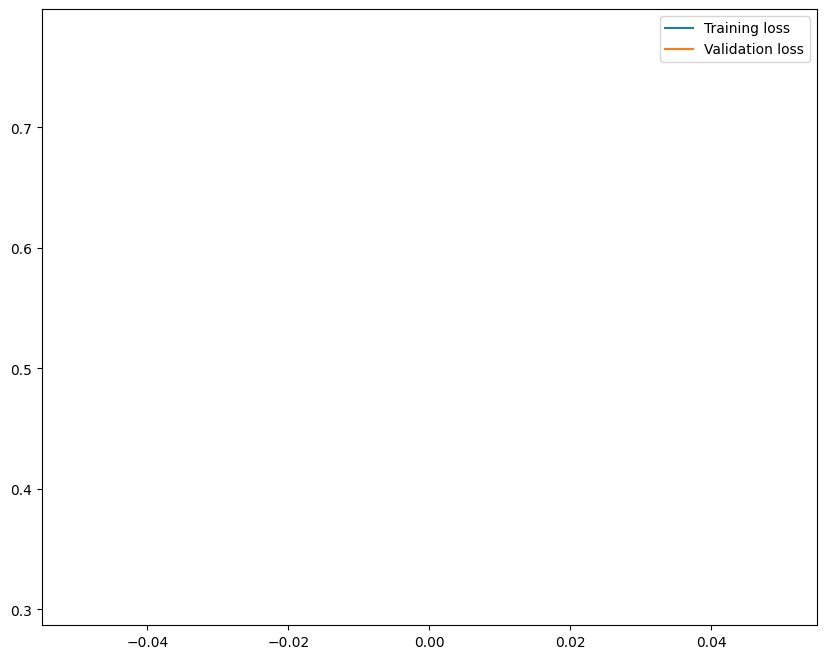

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

302/302 [==============================] - 24s 80ms/step


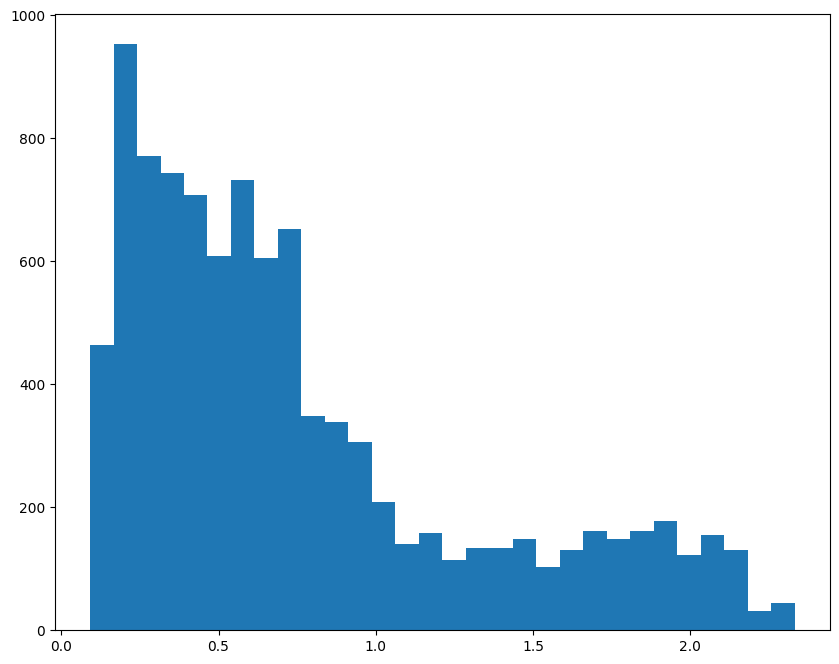

In [ ]:
trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)   #Mean absolute error #trainX actual values
plt.hist(trainMAE, bins=30)
max_trainMAE = 2.3  #or Define 90% value of max as threshold.

In [ ]:
trainMAE

array([[1.10419262],
       [1.0654747 ],
       [1.02508618],
       ...,
       [0.13716115],
       [0.13734777],
       [0.13879324]])

Look at maxmimum and make it your threshold.
I can make thro

703/703 [==============================] - 53s 75ms/step


(array([3265., 2580., 1599., 1049., 1383.,  600.,  248.,   16.,   40.,
          23.,   31.,   61.,  201.,  354.,  388.,  504.,  180.,   33.,
         218.,  924., 2560., 3125., 1981.,  558.,  295.,  175.,   33.,
          17.,   17.,   23.]),
 array([0.06187997, 0.21354401, 0.36520804, 0.51687208, 0.66853611,
        0.82020015, 0.97186418, 1.12352822, 1.27519225, 1.42685629,
        1.57852032, 1.73018436, 1.88184839, 2.03351243, 2.18517646,
        2.3368405 , 2.48850454, 2.64016857, 2.79183261, 2.94349664,
        3.09516068, 3.24682471, 3.39848875, 3.55015278, 3.70181682,
        3.85348085, 4.00514489, 4.15680892, 4.30847296, 4.46013699,
        4.61180103]),
 <BarContainer object of 30 artists>)

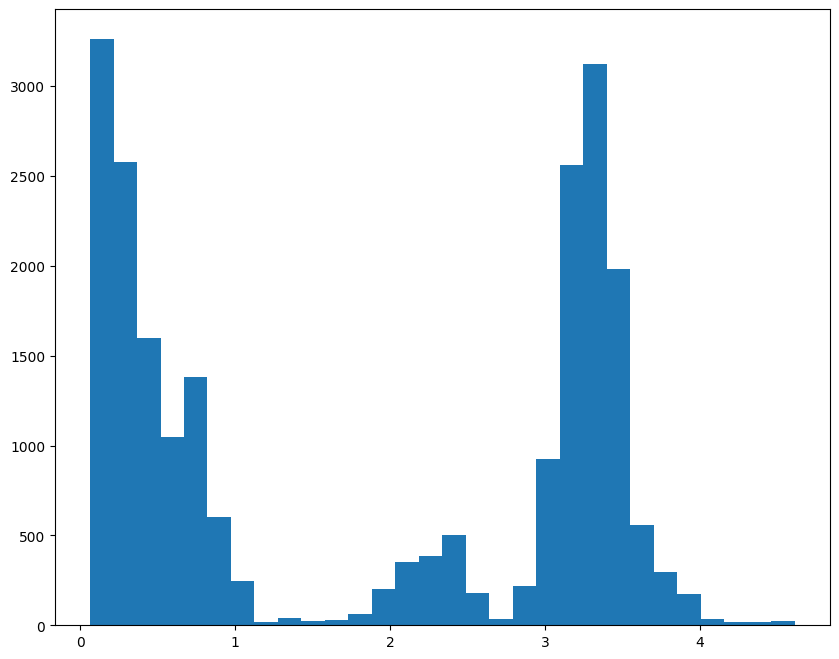

In [ ]:
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)   #Mean absoute error for test
plt.hist(testMAE, bins=30)

In [ ]:
anomaly_df = pd.DataFrame(test[seq_size:])
anomaly_df['testMAE'] = testMAE
anomaly_df['max_trainMAE'] = max_trainMAE
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['max_trainMAE']
anomaly_df['Q_Factor'] = test[seq_size:]['Q_Factor']


In [ ]:
anomaly_df

,Date,Q_Factor,testMAE,max_trainMAE,anomaly
9755,2015-08-08 03:00:00,-0.070888,0.272823,2.3,False
9756,2015-08-08 03:15:00,-0.166634,0.273698,2.3,False
9757,2015-08-08 03:30:00,-0.262379,0.272798,2.3,False
9758,2015-08-08 03:45:00,-0.262379,0.269174,2.3,False
9759,2015-08-08 04:00:00,-0.166634,0.267961,2.3,False
...,...,...,...,...,...
32231,2016-03-31 11:45:00,2.992969,3.173315,2.3,True
32232,2016-03-31 12:00:00,2.992969,3.179687,2.3,True
32233,2016-03-31 12:15:00,2.992969,3.184471,2.3,True
32234,2016-03-31 12:30:00,2.992969,3.186065,2.3,True


In [ ]:
testMAE

array([[16.03467825],
       [16.03461824],
       [16.03460378],
       ...,
       [16.06655317],
       [16.06656802],
       [16.06658287]])

In [ ]:
anomaly_df

,Date,Q_Factor,testMAE,max_trainMAE,anomaly
23322,2016-01-03 19:30:00,2.652974,3.098118,3.3,False
23323,2016-01-03 19:45:00,2.732466,3.098125,3.3,False
23324,2016-01-03 20:00:00,2.573482,3.098124,3.3,False
23325,2016-01-03 20:15:00,2.652974,3.087552,3.3,False
23326,2016-01-03 20:30:00,2.414499,3.084888,3.3,False
...,...,...,...,...,...
32231,2016-03-31 11:45:00,2.414499,2.774813,3.3,False
32232,2016-03-31 12:00:00,2.414499,2.777463,3.3,False
32233,2016-03-31 12:15:00,2.414499,2.780113,3.3,False
32234,2016-03-31 12:30:00,2.414499,2.777464,3.3,False


AttributeError: ignored

<Axes: xlabel='Date', ylabel='testMAE'>

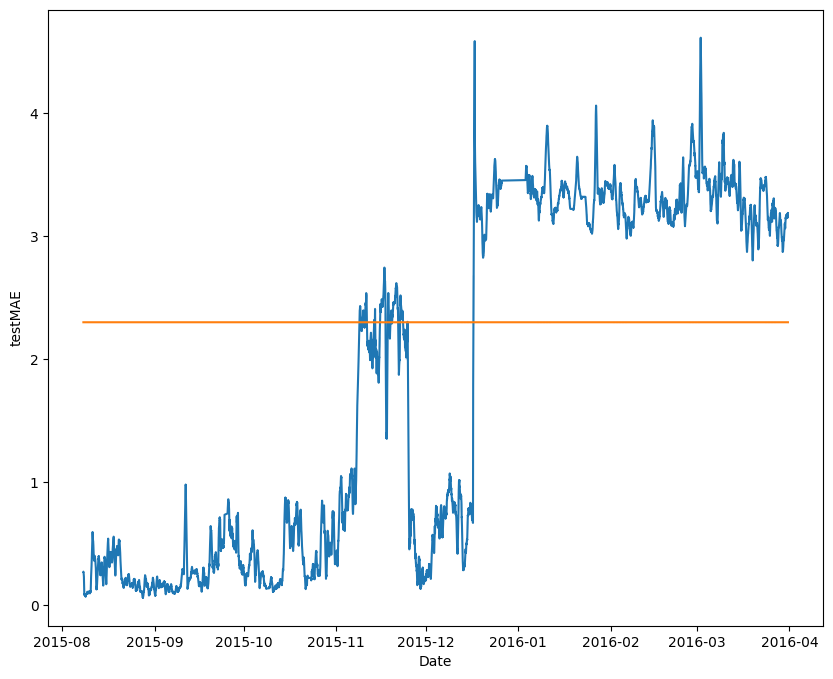

In [ ]:
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['testMAE'])
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['max_trainMAE'])

<Axes: xlabel='Date', ylabel='max_trainMAE'>

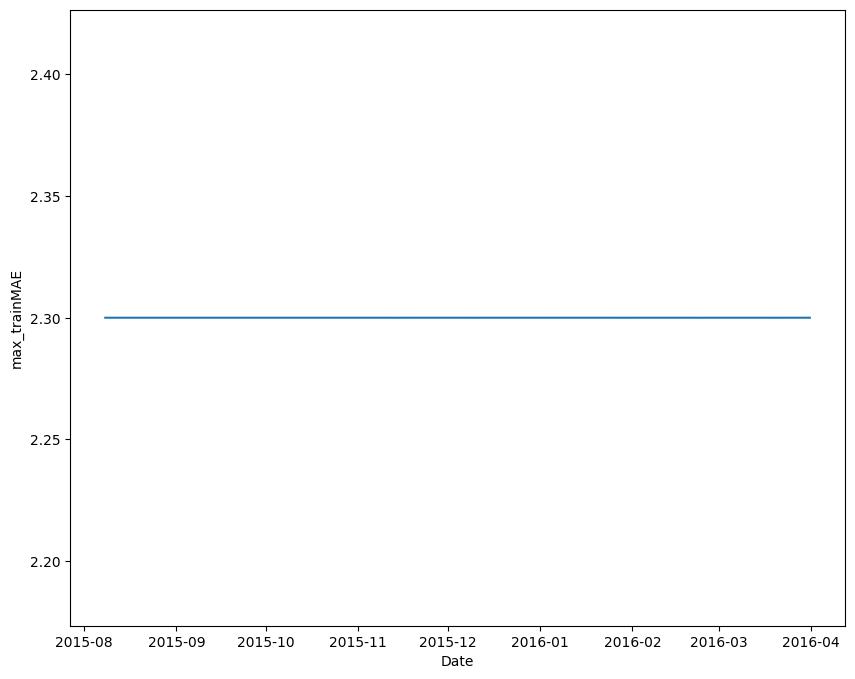

In [ ]:
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['max_trainMAE'])

In [ ]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]

In [ ]:
df

In [ ]:
anomalies.count()

Date            10740
Q_Factor        10740
testMAE         10740
max_trainMAE    10740
anomaly         10740
dtype: int64

<Axes: xlabel='Date', ylabel='Q_Factor'>

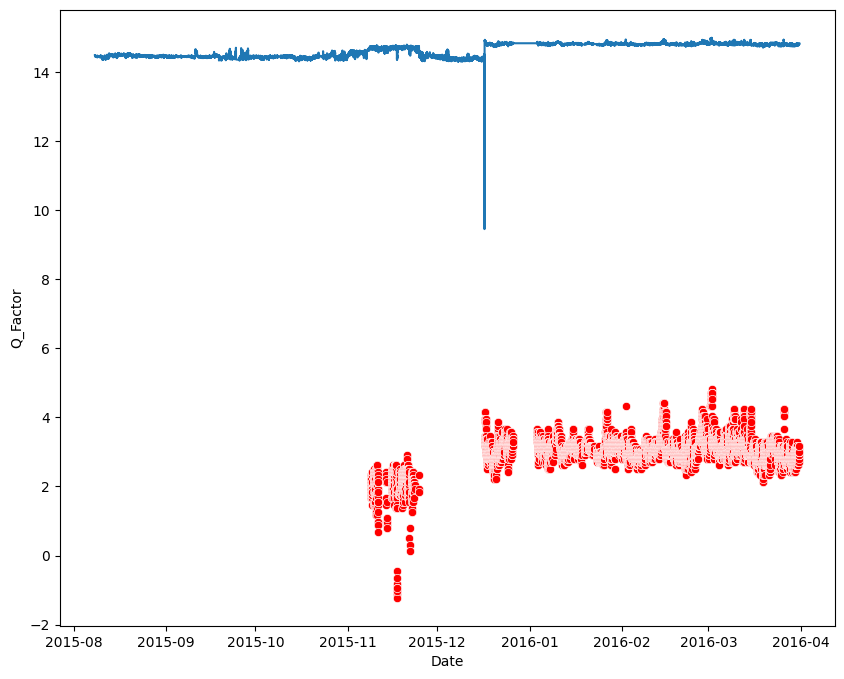

In [ ]:
sns.lineplot(x=anomaly_df['Date'], y=(anomaly_df['Q_Factor']))
sns.scatterplot(x=anomalies['Date'], y=(anomalies['Q_Factor']), color='r')

In [ ]:
y = scaler.inverse_transform(anomaly_df['Q_Factor'].values.reshape(-1,1))


In [ ]:
y

array([[14.48],
       [14.47],
       [14.46],
       ...,
       [14.8 ],
       [14.8 ],
       [14.82]])

In [ ]:
y.reshape(-1,1)

array([[14.48],
       [14.47],
       [14.46],
       ...,
       [14.8 ],
       [14.8 ],
       [14.82]])

In [ ]:
test['Q_Factor']

9695     14.47
9696     14.48
9697     14.49
9698     14.47
9699     14.46
         ...  
32231    14.80
32232    14.80
32233    14.80
32234    14.80
32235    14.82
Name: Q_Factor, Length: 22541, dtype: float64

In [ ]:
yy = anomaly_df['Q_Factor'].values.reshape(-1,1)

In [ ]:
yy

array([[-0.07088825],
       [-0.16663381],
       [-0.26237936],
       ...,
       [ 2.99296949],
       [ 2.99296949],
       [ 3.1844606 ]])

In [ ]:
anomaly_df['Q_Factor']

9755    -0.070888
9756    -0.166634
9757    -0.262379
9758    -0.262379
9759    -0.166634
           ...   
32231    2.992969
32232    2.992969
32233    2.992969
32234    2.992969
32235    3.184461
Name: Q_Factor, Length: 22481, dtype: float64

In [ ]:
y=scaler.inverse_transform(yy)

In [ ]:
yy.shape

(22481, 1)

In [ ]:
y

array([[14.48],
       [14.47],
       [14.46],
       ...,
       [14.8 ],
       [14.8 ],
       [14.82]])

In [ ]:
scaler.inverse_transform(anomaly_df['Q_Factor'].values(-1,1))

TypeError: ignored

In [ ]:
U = scaler.inverse_transform(anomaly_df['Q_Factor'].values.reshape(-1,1))

A=scaler.inverse_transform(anomalies['Q_Factor'].values.reshape(-1,1))

In [ ]:
A

array([[14.68],
       [14.72],
       [14.73],
       ...,
       [14.8 ],
       [14.8 ],
       [14.82]])

In [ ]:
U.shape

(22481, 1)

In [ ]:
sns.lineplot(x=anomaly_df['Date'], y=U)
sns.scatterplot(x=anomalies['Date'], y=A, color='r')



#sns.lineplot(x=anomaly_df['Date'], y=scaler.inverse_transform(yy))
#sns.scatterplot(x=anomalies['Date'], y,color='r')

ValueError: ignored

In [ ]:
sns.lineplot(x=df_input['Date'], y=df_input['Q_Factor'])